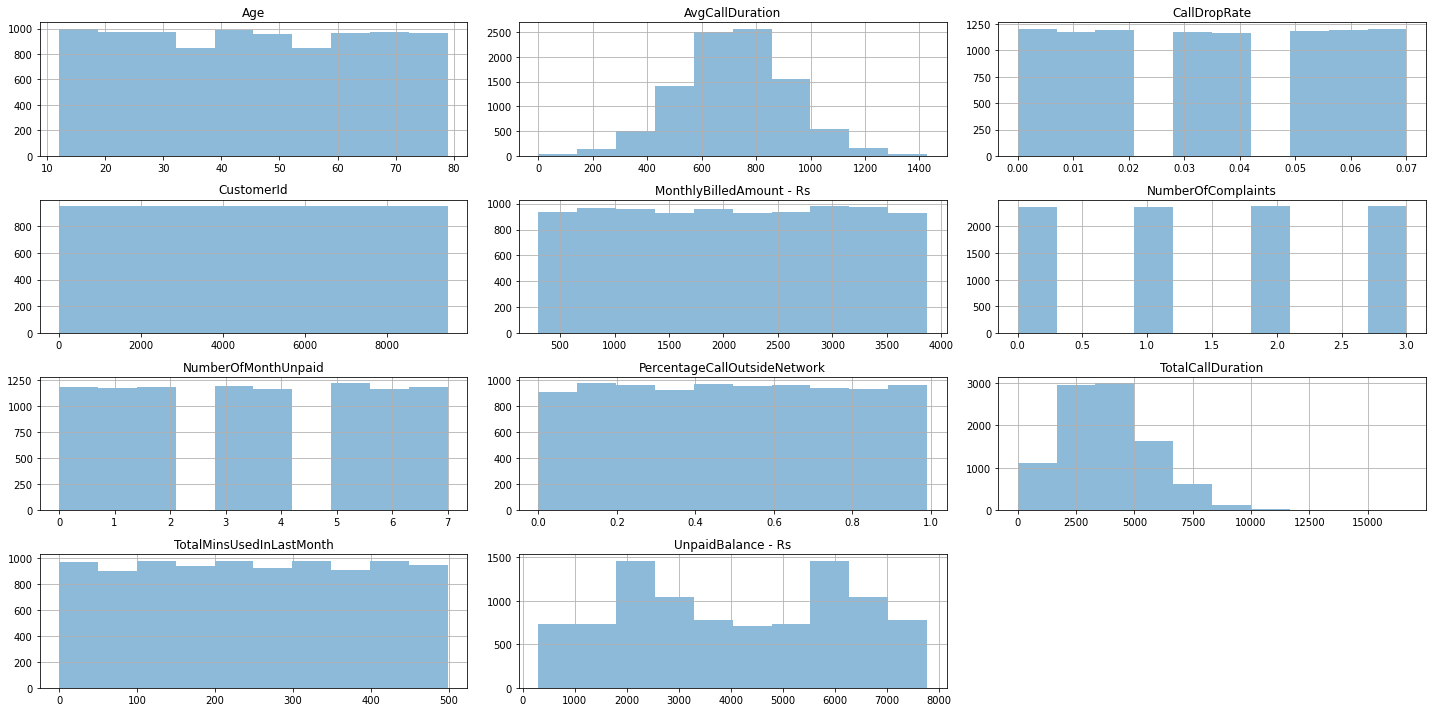

------------------------------------------------------------
Accuracy of logistic regression classifier on test set: 0.93
------------------------------------------------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [30]:
import sklearn
import pandas as pd 
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

## Disable warnings, set Matplotlib inline plotting and load Pandas package
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas as pd


from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

##Loading Data file 
train_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/TelcoChurnDataset.csv")


##plotting histoghrams for analysis 
train_data.hist(alpha=0.5, figsize=(20, 10))
plt.tight_layout()
plt.show()

#encoding isChurned variable into 1 and 0
train_data['isChurned'] = train_data['isChurned'].map({'Yes': 1, 'No': 0 })
train_data['Gender'] = train_data['Gender'].map({'Male': 1, 'Female': 0 })
train_data['isCustomerSuspended'] = train_data['isCustomerSuspended'].map({'Yes': 1, 'No': 0 })

##drop the CustomerId and AvgCallDuration 
final_train = train_data.loc[:, train_data.columns != "CustomerId"]
X = final_train.drop(['isChurned','AvgCallDuration'], axis = 1) 
Y = final_train['isChurned']


## Split the data into training and test sets (0.01 for test with random state =1 )
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.01, random_state=1)

 ##Creating machine learning modle and train the model
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

##Printing the model Accuracy
print("------------------------------------------------------------")
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(
    logreg.score(X_test, np.ravel(y_test, order='C'))))
print("------------------------------------------------------------")

## Predicting the data using train data
y_pred = logreg.predict(X_test)
print(y_pred)
## Saving output into csv file 
y_pred = pd.DataFrame(y_pred, columns=['isChurned']).to_csv('prediction.csv')


